In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"D:\Guvi_Data_Science\MDT33\Capstone_Project\Copper_Modelling\Copper_Set_New.csv")
df.head(2)

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.0


In [3]:
df.shape

(181673, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181673 entries, 0 to 181672
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             181671 non-null  object 
 1   item_date      181672 non-null  float64
 2   quantity tons  181673 non-null  object 
 3   customer       181672 non-null  float64
 4   country        181645 non-null  float64
 5   status         181671 non-null  object 
 6   item type      181673 non-null  object 
 7   application    181649 non-null  float64
 8   thickness      181672 non-null  float64
 9   width          181673 non-null  float64
 10  material_ref   103754 non-null  object 
 11  product_ref    181673 non-null  int64  
 12  delivery date  181672 non-null  float64
 13  selling_price  181672 non-null  float64
dtypes: float64(8), int64(1), object(5)
memory usage: 19.4+ MB


# Handling Wrong Format Data

In [5]:
df['item_date'] = pd.to_datetime(df['item_date'], format='%Y%m%d', errors='coerce').dt.date
df['quantity tons'] = pd.to_numeric(df['quantity tons'], errors='coerce')
df['customer'] = pd.to_numeric(df['customer'], errors='coerce')
df['country'] = pd.to_numeric(df['country'], errors='coerce')
df['application'] = pd.to_numeric(df['application'], errors='coerce')
df['thickness'] = pd.to_numeric(df['thickness'], errors='coerce')
df['width'] = pd.to_numeric(df['width'], errors='coerce')
df['material_ref'] = df['material_ref'].str.lstrip('0')
df['product_ref'] = pd.to_numeric(df['product_ref'], errors='coerce')
df['delivery date'] = pd.to_datetime(df['delivery date'], format='%Y%m%d', errors='coerce').dt.date
df['selling_price'] = pd.to_numeric(df['selling_price'], errors='coerce')

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181672.0,5.874926e+03,2.349081e+06,-2000.00,1.097030e+01,3.036464e+01,6.716061e+01,1.000000e+09
customer,181672.0,3.051221e+07,2.433382e+07,12458.00,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181645.0,4.489302e+01,2.440421e+01,25.00,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181649.0,2.561581e+01,1.775417e+01,2.00,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181672.0,2.564827e+00,6.572321e+00,0.18,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181672.0,1.918036e+03,3.317956e+05,-1160.00,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


# Replacing Negative Values

In [7]:
#converting the negative values into the null values
df["quantity tons"]= df["quantity tons"].apply(lambda x: np.nan if x<=0 else x)
df["selling_price"]= df["selling_price"].apply(lambda x: np.nan if x<=0 else x)

In [8]:
df.nunique()

id               181671
item_date           250
quantity tons    181668
customer           1169
country              17
status                9
item type             7
application          30
thickness           594
width              1386
material_ref      16562
product_ref          33
delivery date        26
selling_price      9789
dtype: int64

In [9]:
df.isnull().sum()

id                   2
item_date            3
quantity tons        5
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        8
dtype: int64

In [10]:
nunique = df.nunique()
null_count = df.isnull().sum()
summary_df = pd.DataFrame({
    'Unique Values': nunique,
    'Null Values': null_count
})
summary_df

,Unique Values,Null Values
id,181671,2
item_date,250,3
quantity tons,181668,5
customer,1169,1
country,17,28
status,9,2
item type,7,0
application,30,24
thickness,594,1
width,1386,0


In [11]:
# material ref have more than 55% are null values and id have all are unique values. so we have drop both columns.
df.drop(columns=['id','material_ref'], inplace=True)

In [12]:
df.dtypes

item_date         object
quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
product_ref        int64
delivery date     object
selling_price    float64
dtype: object

# Handling the Null/NAN values using Mean,Mode,Median.

In [13]:
# Select only columns with object dtype
object_columns = df.select_dtypes(include='object')
print(object_columns.columns)

Index(['item_date', 'status', 'item type', 'delivery date'], dtype='object')


In [14]:
# object datatype using mode
df['item_date'].fillna(df['item_date'].mode().iloc[0], inplace=True)
df['status'].fillna(df['status'].mode().iloc[0], inplace=True)
df['delivery date'].fillna(df['delivery date'].mode().iloc[0], inplace=True)

In [15]:
#numerical datatype using median
df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)
df['customer'].fillna(df['customer'].median(), inplace=True)
df['country'].fillna(df['country'].median(), inplace=True)
df['application'].fillna(df['application'].median(), inplace=True)
df['thickness'].fillna(df['thickness'].median(), inplace=True)
df['selling_price'].fillna(df['selling_price'].median(), inplace=True)

In [16]:
df.isnull().sum()

item_date        0
quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
delivery date    0
selling_price    0
dtype: int64

In [17]:
df.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price
0,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.0,1500.0,1670798778,2021-07-01,854.0
1,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.8,1210.0,1668701718,2021-04-01,1047.0


In [18]:
df1 = df.copy()

# Encoding the Columns

In [19]:
df1['status'].unique()

array(['Won', 'Draft', 'To be approved', 'Lost', 'Not lost for AM',
       'Wonderful', 'Revised', 'Offered', 'Offerable'], dtype=object)

In [20]:
df1['item type'].unique()

array(['W', 'WI', 'S', 'Others', 'PL', 'IPL', 'SLAWR'], dtype=object)

In [21]:
# convert categorical data into numerical data - using map and ordinal encoder methods

df1['status'] = df1['status'].map({'Lost':0, 'Won':1, 'Draft':2, 'To be approved':3, 'Not lost for AM':4,
                                 'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})
df1['item type']=df1['item type'].map({'W':1,'WI':2,'S':3,'Others':4,'PL':5,'IPL':6,'SLAWR':7})

In [22]:
df1['item type'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [23]:
df1['status'].unique()

array([1, 2, 3, 0, 4, 5, 6, 7, 8], dtype=int64)

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181673.0,5.874905e+03,2.349075e+06,0.00001,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,12458.00000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,25.00000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
application,181673.0,2.561441e+01,1.775342e+01,2.00000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,0.18000,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.00000,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.00000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181673.0,1.918076e+03,3.317947e+05,0.10000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


# Skewness Handling - Feature Scaling (Log Transformation)

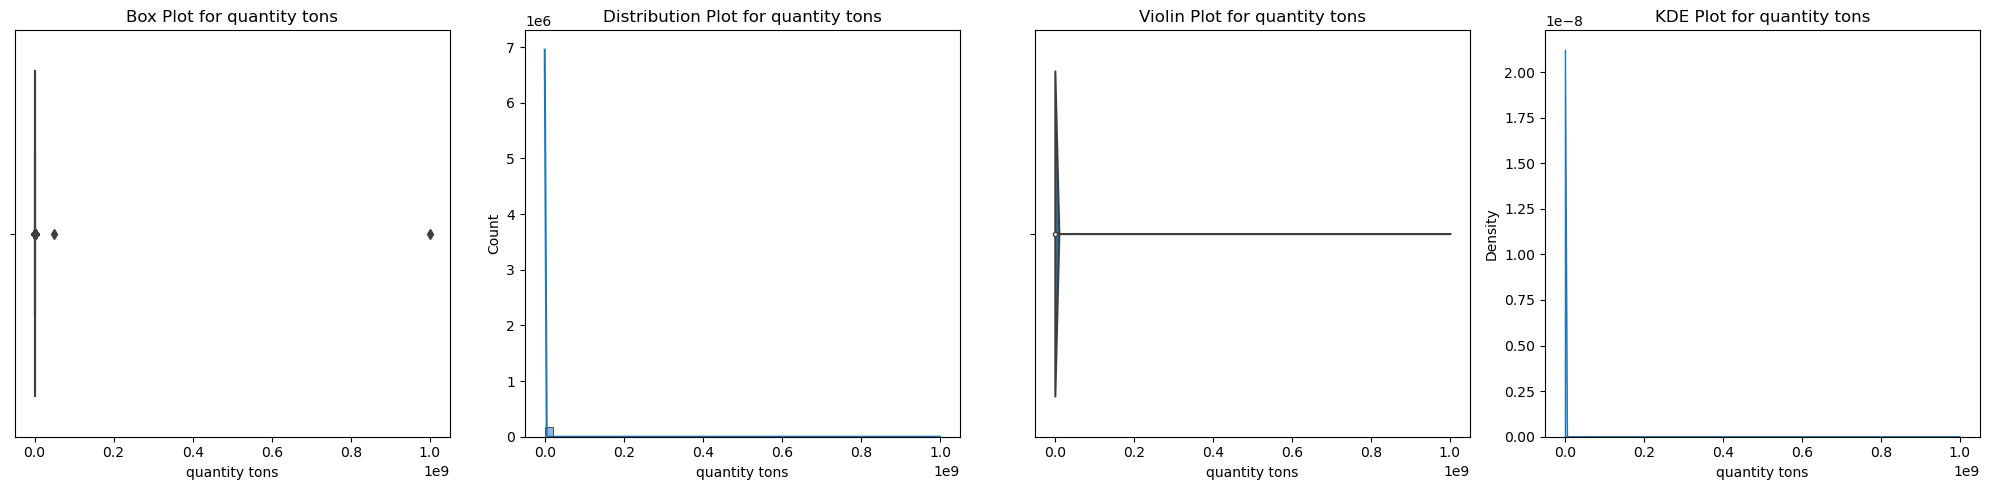

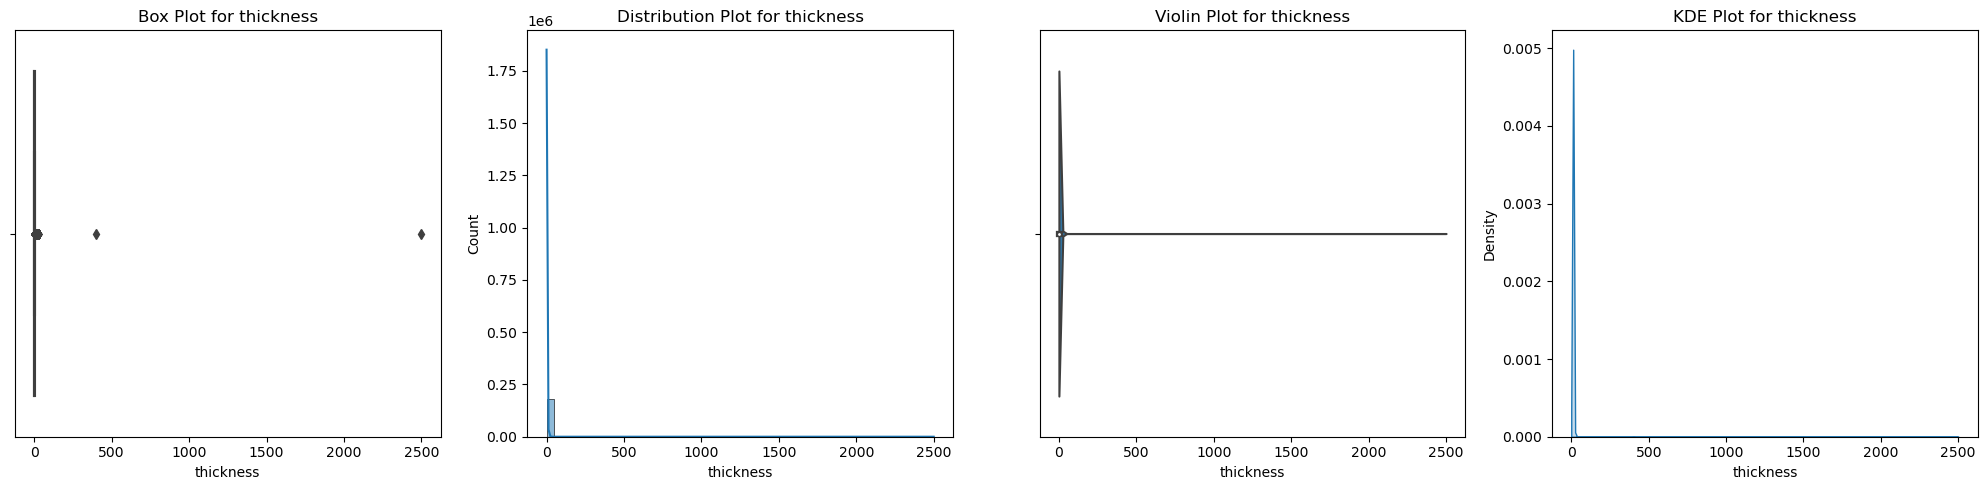

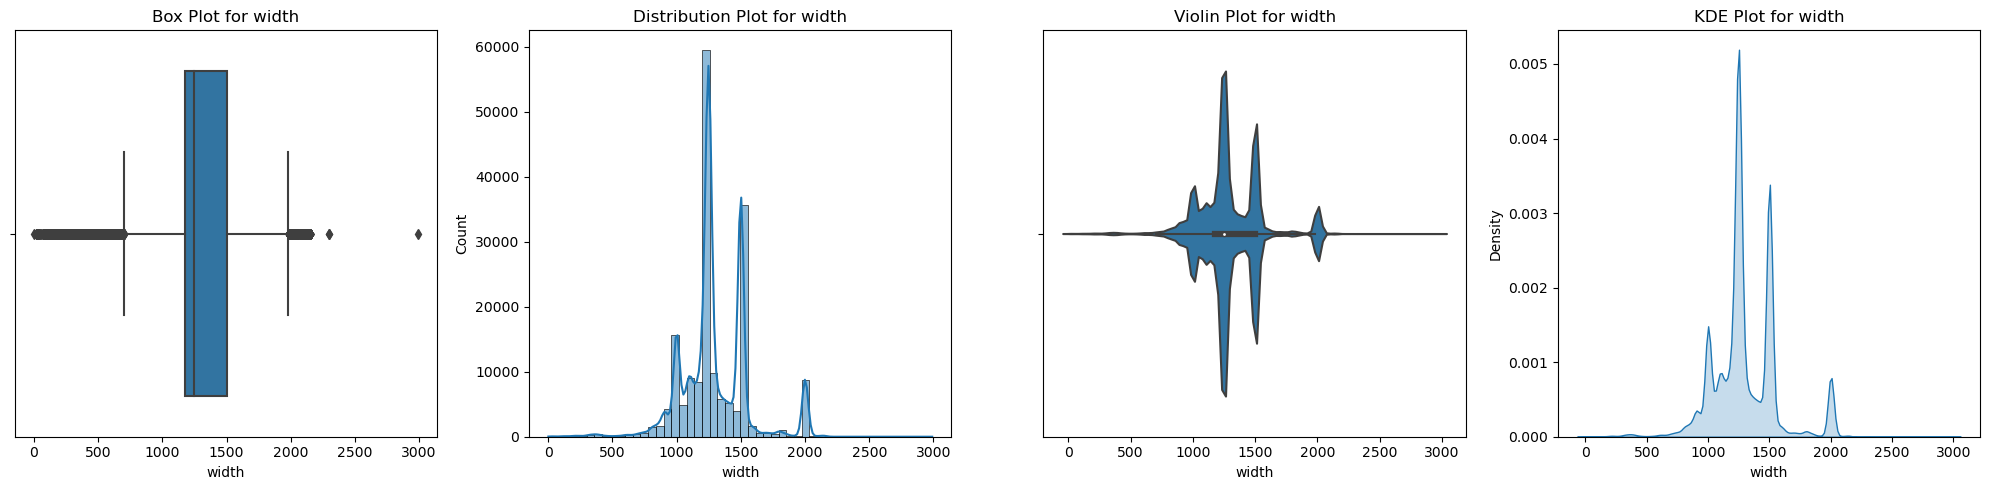

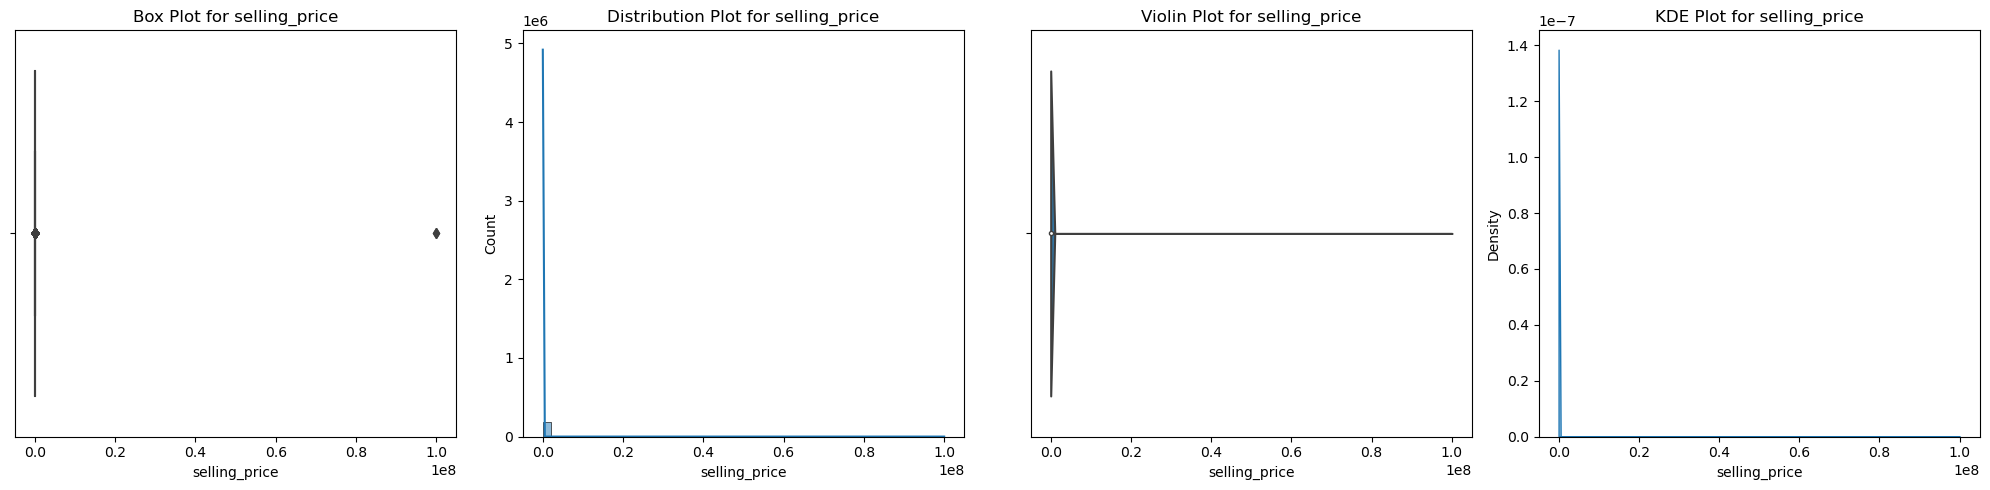

In [25]:
def plot(df, column):
    plt.figure(figsize=(20,5))
    
    plt.subplot(1,4,1)
    sns.boxplot(data=df, x=column)
    plt.title(f'Box Plot for {column}')

    plt.subplot(1,4,2)
    sns.histplot(data=df, x=column, kde=True, bins=50)
    plt.title(f'Distribution Plot for {column}')

    plt.subplot(1,4,3)
    sns.violinplot(data=df, x=column)
    plt.title(f'Violin Plot for {column}')
    
    
    plt.subplot(1,4,4)
    sns.kdeplot(data=df, x=column, shade=True)
    plt.title(f'KDE Plot for {column}')
    
    plt.tight_layout()
    plt.show()
    
for i in ['quantity tons','thickness', 'width', 'selling_price']:
    plot(df1, i)

In [26]:
#With respect to the above plots, Quantity tons, thickness and selling price data are skewd. 
#so using the log transformation  method to handle the skewness data

In [27]:
def apply_transformation(df, columns):
    for column in columns:
        df[f'{column}_log'] = np.log(df[column] + 1)  # Adding 1 to avoid log(0)
    return df
skewed_columns = ['thickness', 'selling_price', 'quantity tons']
df = apply_transformation(df1, skewed_columns)

In [28]:
df1.head(2)

,item_date,quantity tons,customer,country,status,item type,application,thickness,width,product_ref,delivery date,selling_price,thickness_log,selling_price_log,quantity tons_log
0,2021-04-01,54.151139,30156308.0,28.0,1,1,10.0,2.0,1500.0,1670798778,2021-07-01,854.0,1.098612,6.751101,4.010077
1,2021-04-01,768.024839,30202938.0,25.0,1,1,41.0,0.8,1210.0,1668701718,2021-04-01,1047.0,0.587787,6.954639,6.645123


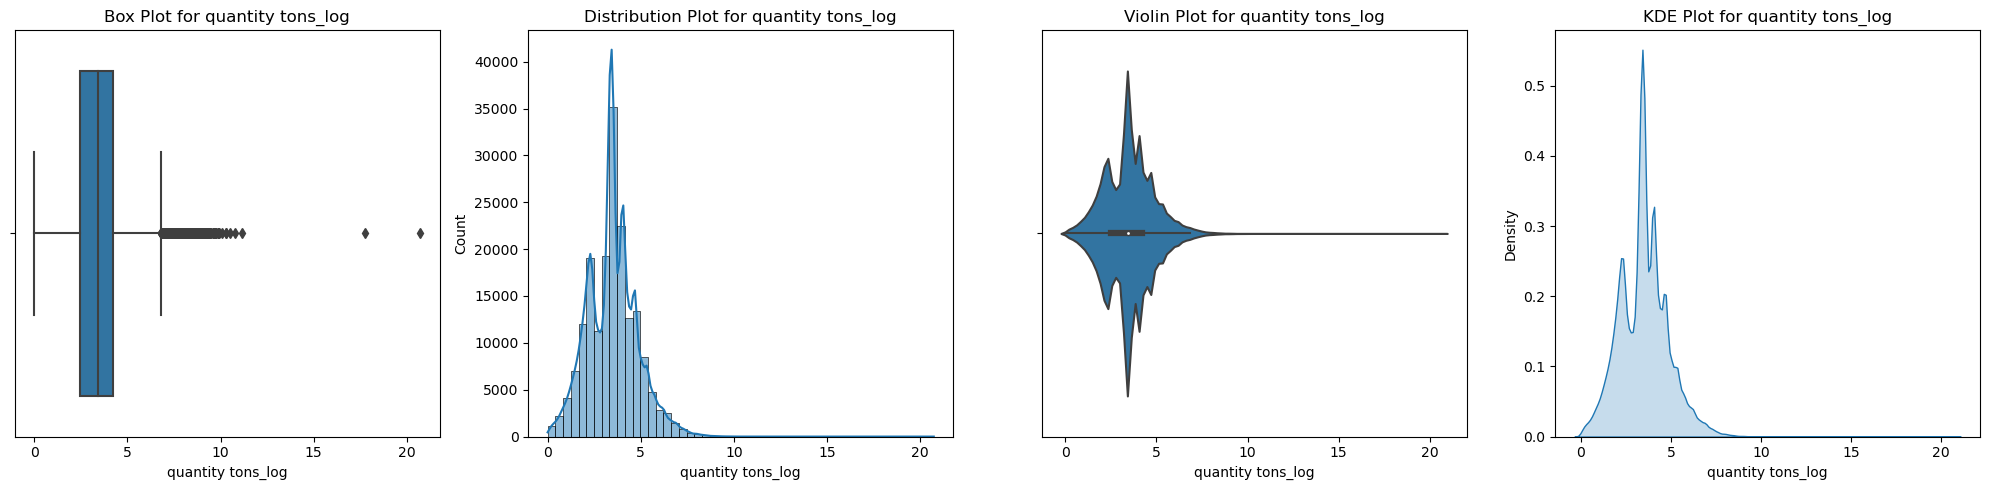

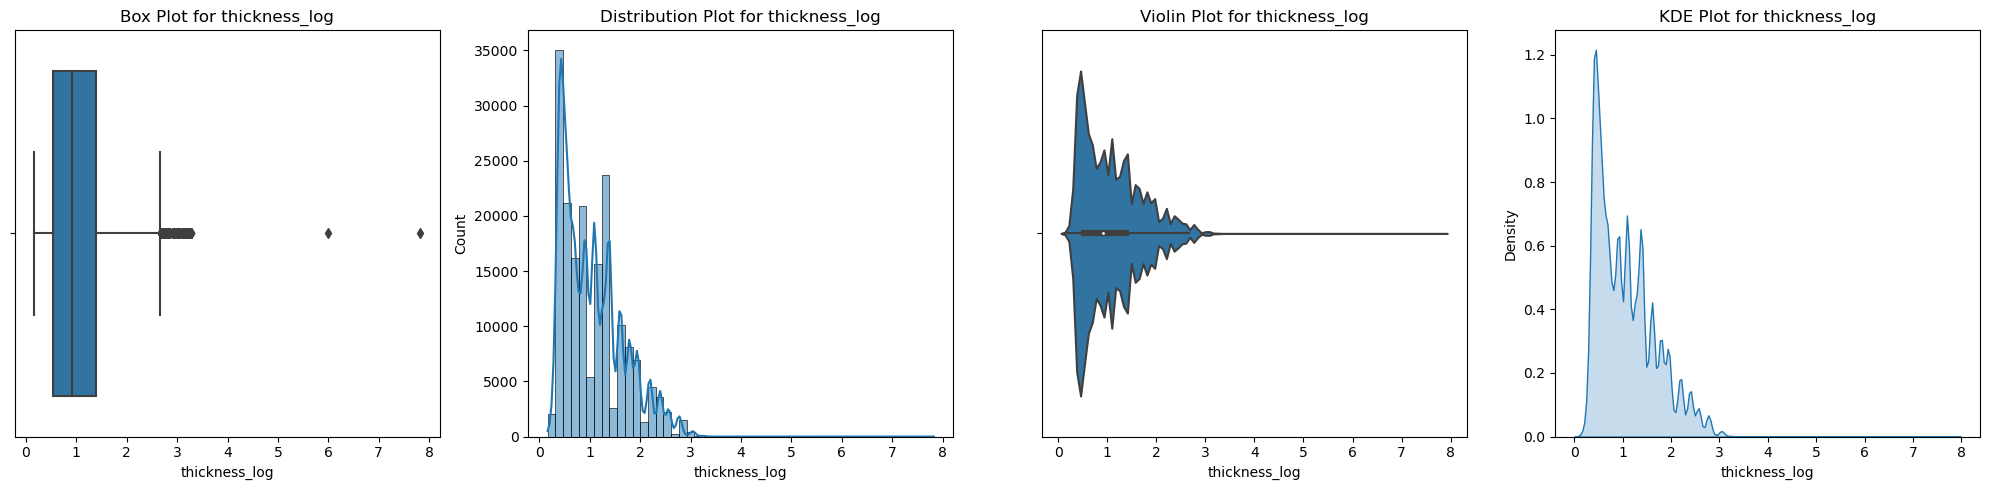

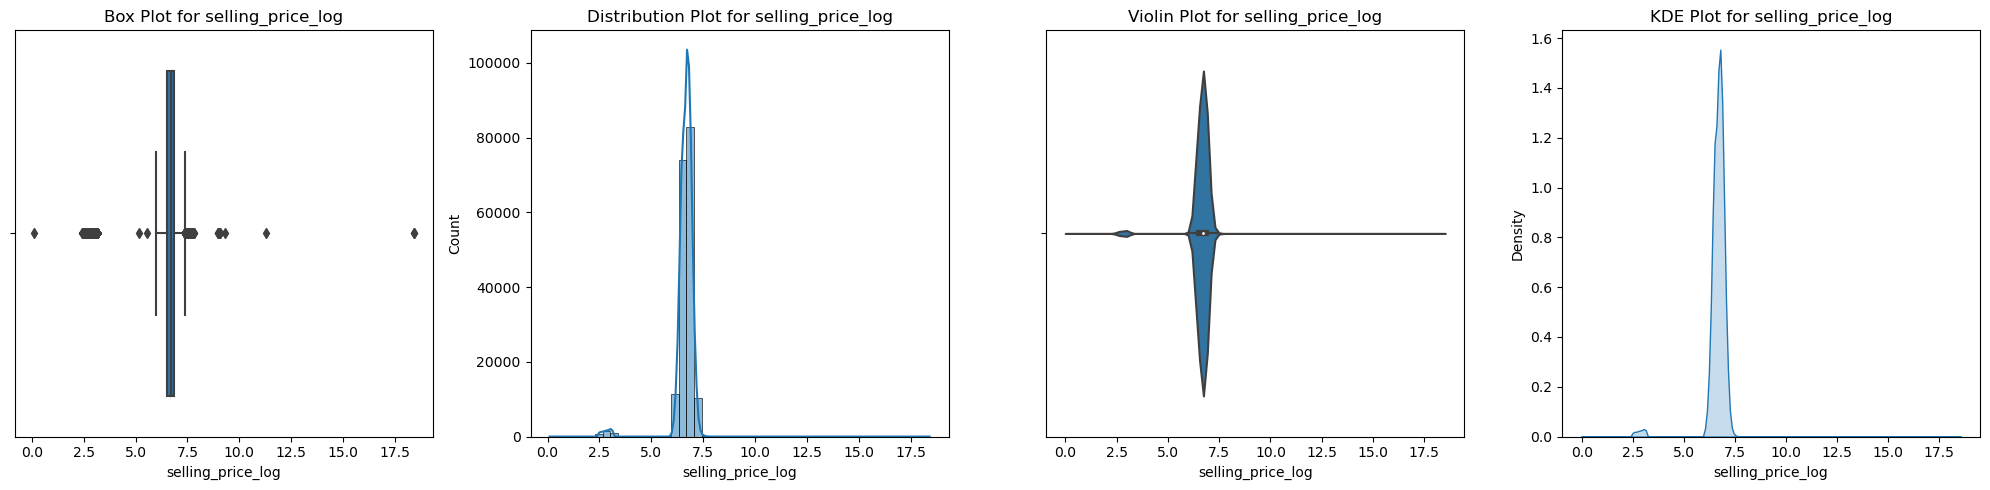

In [29]:
for i in ['quantity tons_log', 'thickness_log','selling_price_log']:
    plot(df1, i)

In [30]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,181673.0,5.874905e+03,2.349075e+06,0.000010,1.097167e+01,3.036501e+01,6.716038e+01,1.000000e+09
customer,181673.0,3.051221e+07,2.433375e+07,12458.000000,3.019688e+07,3.020524e+07,3.028042e+07,2.147484e+09
country,181673.0,4.489073e+01,2.440303e+01,25.000000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,181673.0,1.316684e+00,1.330310e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,181673.0,1.900558e+00,1.117545e+00,1.000000,1.000000e+00,1.000000e+00,3.000000e+00,7.000000e+00
application,181673.0,2.561441e+01,1.775342e+01,2.000000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,181673.0,2.564822e+00,6.572303e+00,0.180000,7.000000e-01,1.500000e+00,3.000000e+00,2.500000e+03
width,181673.0,1.295287e+03,2.616318e+02,1.000000,1.180000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,181673.0,4.739679e+08,7.175101e+08,611728.000000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,181673.0,1.918076e+03,3.317947e+05,0.100000,6.690000e+02,8.120000e+02,9.530000e+02,1.000010e+08


In [31]:
df2=df1.copy()

# Outliers Handling - Interquartile Range (IQR) method

In [32]:
# Using IQR and clip() methods to handle the outliers and add a new column of dataframe
def treat_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df
    

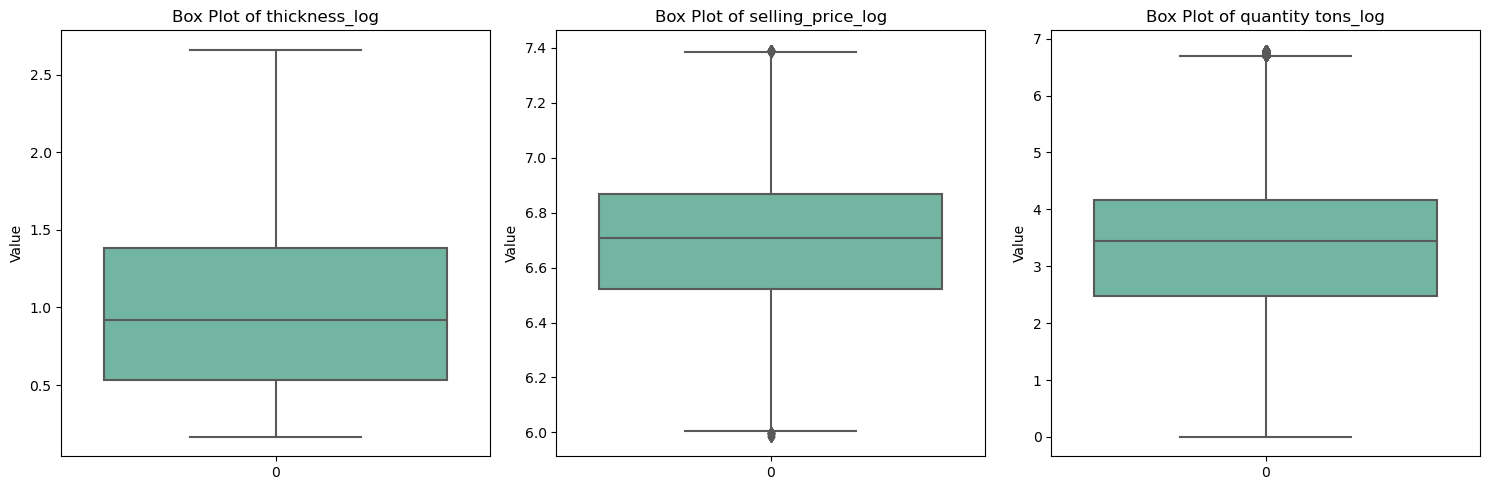

In [33]:

columns_with_outliers = ['thickness_log', 'selling_price_log', 'quantity tons_log']

# Remove outliers using the IQR method
df2 = treat_outliers(df2, columns_with_outliers)

# Plot separate box plots for each column after removing outliers

plt.figure(figsize=(15, 5))
for i, column in enumerate(columns_with_outliers, 1):
    plt.subplot(1, len(columns_with_outliers), i)
    sns.boxplot(data=df2[column], orient="v", palette="Set2")
    plt.title(f'Box Plot of {column}')
    plt.ylabel("Value")
    

plt.tight_layout()
plt.show()

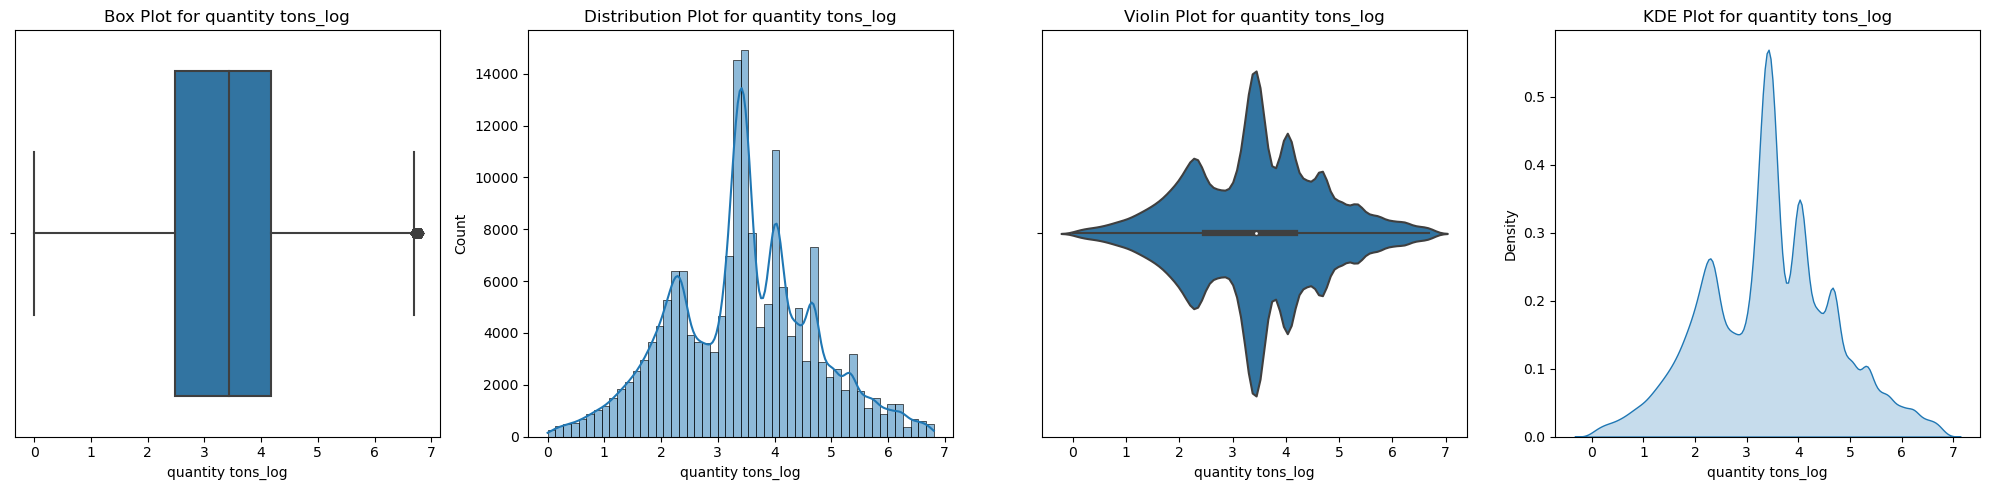

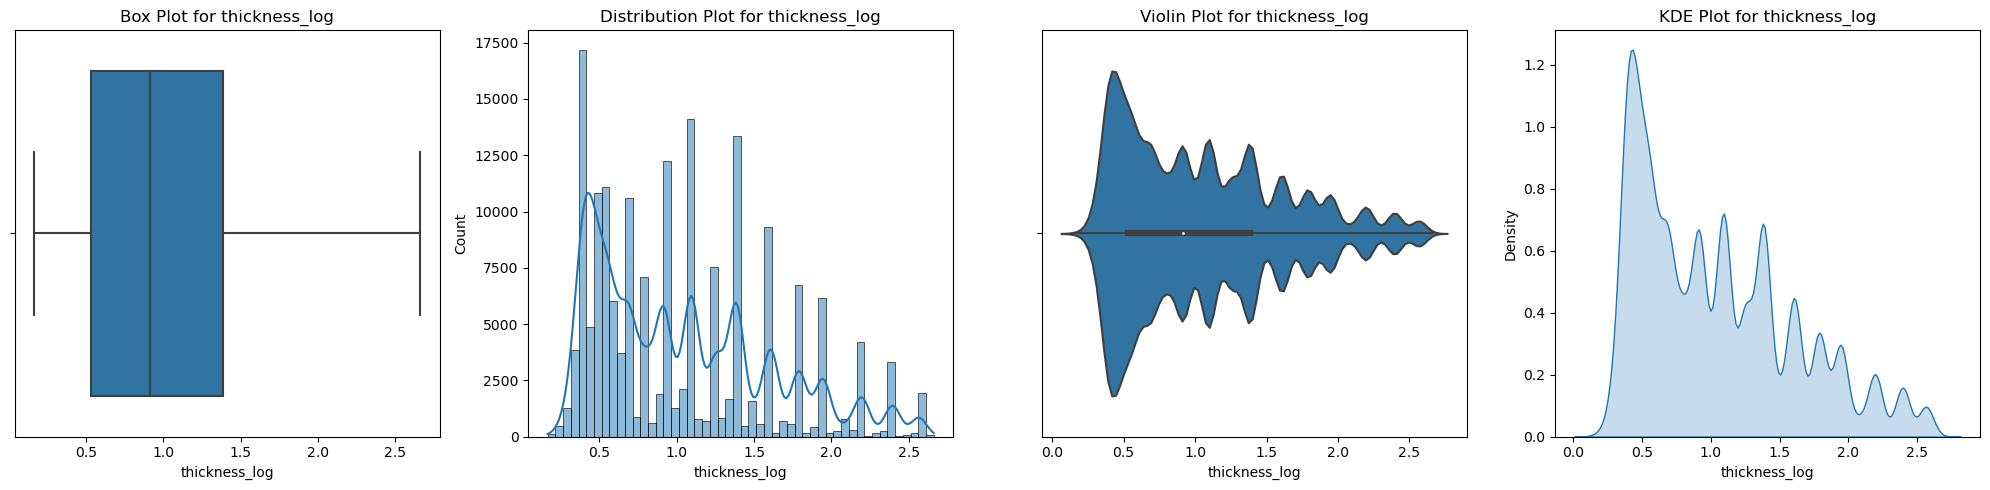

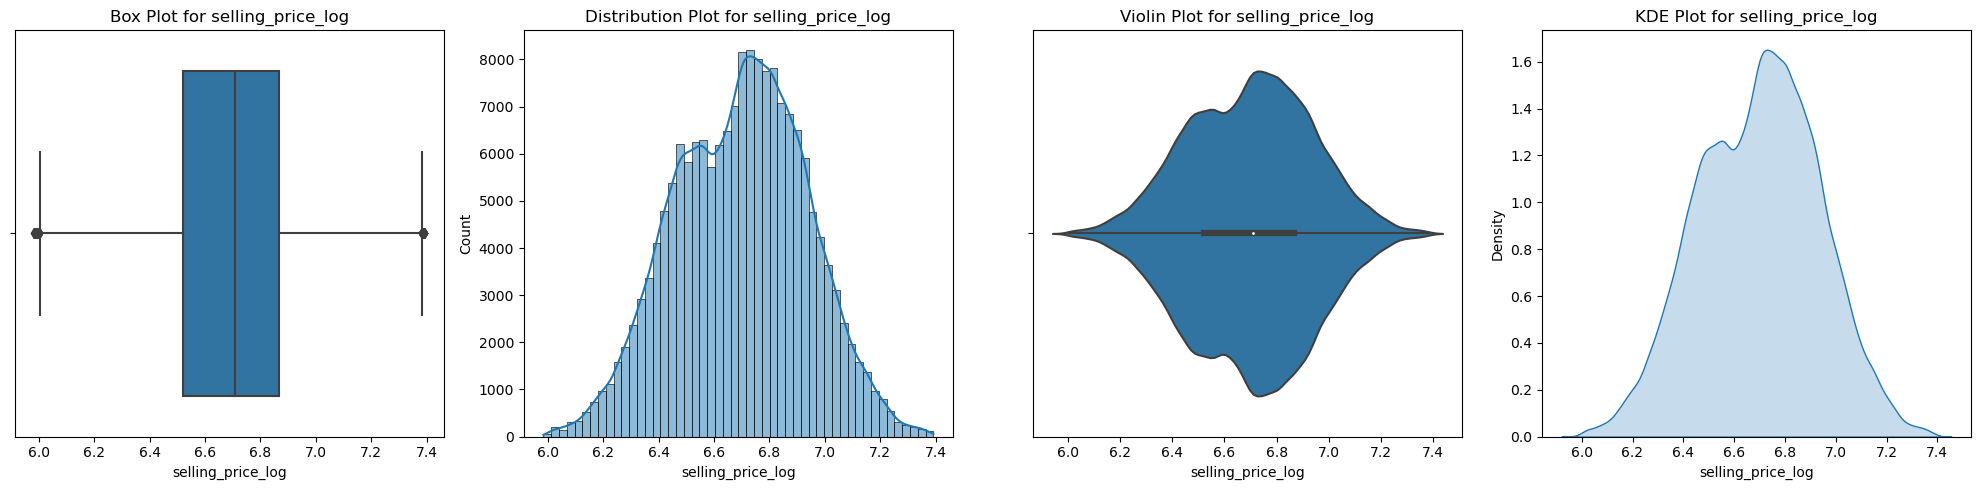

In [34]:
for i in ['quantity tons_log', 'thickness_log', 'selling_price_log']:
    plot(df2, i)

In [35]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
quantity tons,173463.0,6.486766e+01,1.059371e+02,0.000010,1.100409e+01,3.011614e+01,6.347611e+01,9.033942e+02
customer,173463.0,3.028131e+07,1.016756e+07,12458.000000,3.019688e+07,3.020531e+07,3.028009e+07,2.147484e+09
country,173463.0,4.489201e+01,2.443114e+01,25.000000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,173463.0,1.306002e+00,1.337707e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,173463.0,1.881548e+00,1.099366e+00,1.000000,1.000000e+00,1.000000e+00,3.000000e+00,7.000000e+00
application,173463.0,2.555012e+01,1.776192e+01,2.000000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
thickness,173463.0,2.394354e+00,2.387641e+00,0.180000,7.000000e-01,1.500000e+00,3.000000e+00,1.332000e+01
width,173463.0,1.292782e+03,2.600161e+02,1.000000,1.175000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,173463.0,4.804840e+08,7.202038e+08,611728.000000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
selling_price,173463.0,8.316623e+02,1.975493e+02,396.000000,6.780000e+02,8.180000e+02,9.580000e+02,1.622000e+03


<Axes: >

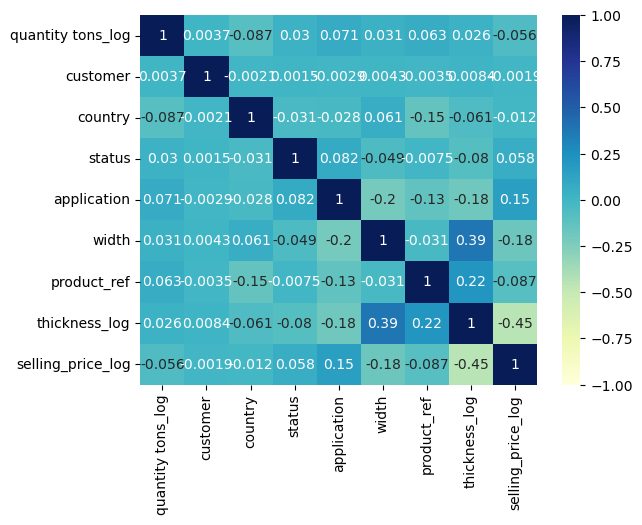

In [36]:
# Need to verify any columns are highly correlated using Heatmap. If any columns correalaion value >= 0.7 (absolute value), drop the columns.

col = ['quantity tons_log','customer','country','status','application','width','product_ref','thickness_log','selling_price_log']
df_heatmap = df2[col].corr()
sns.heatmap(df_heatmap, annot=True, cmap="YlGnBu", vmin=-1, vmax=1, center=0)

In [37]:
#No value is close to 0.7..Hence therefore, there is no strong correlation between any columns so no need to drop any columns

In [38]:
df2.columns

Index(['item_date', 'quantity tons', 'customer', 'country', 'status',
       'item type', 'application', 'thickness', 'width', 'product_ref',
       'delivery date', 'selling_price', 'thickness_log', 'selling_price_log',
       'quantity tons_log'],
      dtype='object')

In [39]:
df3 = df2.copy()

In [40]:
df3.drop(columns=['item_date', 'quantity tons', 'selling_price','thickness', 'delivery date'], inplace=True)

In [41]:
df3.head(2)

,customer,country,status,item type,application,width,product_ref,thickness_log,selling_price_log,quantity tons_log
0,30156308.0,28.0,1,1,10.0,1500.0,1670798778,1.098612,6.751101,4.010077
1,30202938.0,25.0,1,1,41.0,1210.0,1668701718,0.587787,6.954639,6.645123


In [42]:
df3.describe().T

,count,mean,std,min,25%,50%,75%,max
customer,173463.0,3.028131e+07,1.016756e+07,12458.000000,3.019688e+07,3.020531e+07,3.028009e+07,2.147484e+09
country,173463.0,4.489201e+01,2.443114e+01,25.000000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,173463.0,1.306002e+00,1.337707e+00,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00
item type,173463.0,1.881548e+00,1.099366e+00,1.000000,1.000000e+00,1.000000e+00,3.000000e+00,7.000000e+00
application,173463.0,2.555012e+01,1.776192e+01,2.000000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
width,173463.0,1.292782e+03,2.600161e+02,1.000000,1.175000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,173463.0,4.804840e+08,7.202038e+08,611728.000000,6.119930e+05,6.406650e+05,1.332077e+09,1.722208e+09
thickness_log,173463.0,1.038701e+00,5.719438e-01,0.165514,5.306283e-01,9.162907e-01,1.386294e+00,2.661657e+00
selling_price_log,173463.0,6.696679e+00,2.372748e-01,5.983936,6.520621e+00,6.708084e+00,6.865891e+00,7.392032e+00
quantity tons_log,173463.0,3.424452e+00,1.243287e+00,0.000010,2.485248e+00,3.437727e+00,4.166295e+00,6.807265e+00


# Classifiaction Model - Logistic Regression, 

In [43]:
df4 = df3.copy()

In [44]:
#removing others rows except won and lost in status column

df4=df4[df4['status'].isin([1, 0])]

In [45]:
df4

,customer,country,status,item type,application,width,product_ref,thickness_log,selling_price_log,quantity tons_log
0,30156308.0,28.0,1,1,10.0,1500.0,1670798778,1.098612,6.751101,4.010077
1,30202938.0,25.0,1,1,41.0,1210.0,1668701718,0.587787,6.954639,6.645123
2,30153963.0,30.0,1,2,28.0,952.0,628377,0.322083,6.469762,5.958755
3,30349574.0,32.0,1,3,59.0,1317.0,1668701718,1.193922,6.645091,5.315229
4,30211560.0,28.0,1,1,10.0,2000.0,640665,1.609438,6.359574,6.667626
...,...,...,...,...,...,...,...,...,...,...
181668,30200854.0,25.0,1,1,41.0,1220.0,164141591,0.672944,6.383507,4.639402
181669,30200854.0,25.0,1,1,41.0,1500.0,164141591,0.667829,6.380123,5.342748
181670,30200854.0,25.0,1,1,41.0,1250.0,164141591,0.536493,6.429719,1.655480
181671,30200854.0,25.0,1,1,41.0,1250.0,164141591,0.615186,6.400257,3.445693


In [46]:
df4['status'].value_counts()

status
1    113012
0     33178
Name: count, dtype: int64

In [47]:
df4.describe().T

,count,mean,std,min,25%,50%,75%,max
customer,146190.0,3.026164e+07,7.831899e+06,12458.000000,3.019688e+07,3.020531e+07,3.027916e+07,2.147484e+09
country,146190.0,4.547891e+01,2.452214e+01,25.000000,2.600000e+01,3.000000e+01,7.800000e+01,1.130000e+02
status,146190.0,7.730488e-01,4.188622e-01,0.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
item type,146190.0,1.824454e+00,1.098560e+00,1.000000,1.000000e+00,1.000000e+00,3.000000e+00,7.000000e+00
application,146190.0,2.524788e+01,1.765377e+01,2.000000,1.000000e+01,1.500000e+01,4.100000e+01,9.900000e+01
width,146190.0,1.294833e+03,2.646127e+02,1.000000,1.174000e+03,1.250000e+03,1.500000e+03,2.990000e+03
product_ref,146190.0,4.782448e+08,7.183634e+08,611728.000000,6.281170e+05,6.406650e+05,1.332077e+09,1.722208e+09
thickness_log,146190.0,1.049399e+00,5.724953e-01,0.165514,5.423243e-01,9.162907e-01,1.386294e+00,2.661657e+00
selling_price_log,146190.0,6.690814e+00,2.365276e-01,5.983936,6.513230e+00,6.701960e+00,6.860970e+00,7.392032e+00
quantity tons_log,146190.0,3.394984e+00,1.243280e+00,0.000010,2.435641e+00,3.420330e+00,4.130394e+00,6.806899e+00


In [48]:
df4.isnull().sum()

customer             0
country              0
status               0
item type            0
application          0
width                0
product_ref          0
thickness_log        0
selling_price_log    0
quantity tons_log    0
dtype: int64

In [49]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix,classification_report, f1_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from imblearn.combine import SMOTETomek

import pickle

In [50]:
# Data is unbalance so dealing with Over Sampling using SMOTE

In [51]:
pip install imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [52]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Separate features and target
X = df4.drop(columns=['status'])
y = df4['status']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

# Check the class distribution after resampling
print("Class distribution before resampling:")
print(y_train.value_counts())

print("Class distribution after resampling:")
print(y_train_resampled.value_counts())

Class distribution before resampling:
status
1    90410
0    26542
Name: count, dtype: int64
Class distribution after resampling:
status
1    90410
0    90410
Name: count, dtype: int64


In [53]:
def accuracy(x_df, y_df, algorithm):
    #  Train-test splitting
    x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=42)

    # Initialize and train the model
    model = algorithm().fit(x_train, y_train)

    # Make predictions
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Compute accuracy scores
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)

    # Store metrics in a dictionary
    metrics = {
        "Algorithm": algorithm.__name__,
        "Accuracy_Train": accuracy_train,
        "Accuracy_Test": accuracy_test,
        "F1_Score": f1
    }

    return metrics

In [54]:
# List of algorithms to evaluate
algorithms = [
    DecisionTreeClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    XGBClassifier
]

In [55]:
# Collect metrics for each algorithm
metrics_list = [accuracy(X, y, algo) for algo in algorithms]
metrics_df = pd.DataFrame(metrics_list)

In [56]:
metrics_df

,Algorithm,Accuracy_Train,Accuracy_Test,F1_Score
0,DecisionTreeClassifier,1.000000,0.915966,0.945571
1,RandomForestClassifier,1.000000,0.936829,0.959390
2,AdaBoostClassifier,0.811966,0.809700,0.883972
3,GradientBoostingClassifier,0.832418,0.832239,0.898542
4,XGBClassifier,0.913221,0.898728,0.935794


In [57]:
metrics_list1 = [accuracy(x_train_resampled, y_train_resampled, algo) for algo in algorithms]
metrics_df_resampled = pd.DataFrame(metrics_list1)

In [58]:
metrics_df_resampled

,Algorithm,Accuracy_Train,Accuracy_Test,F1_Score
0,DecisionTreeClassifier,1.000000,0.927801,0.927317
1,RandomForestClassifier,0.999993,0.954236,0.953173
2,AdaBoostClassifier,0.744684,0.741704,0.735988
3,GradientBoostingClassifier,0.782249,0.781412,0.774844
4,XGBClassifier,0.914860,0.905624,0.903240


In [59]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize and train the RandomForestClassifier with resampled data
x_train, x_test, y_train, y_test = train_test_split(x_train_resampled, y_train_resampled, test_size=0.2, random_state=42)

rfc_model2 = RandomForestClassifier()
rfc_model2.fit(x_train_resampled, y_train_resampled)

# Predict on the test set
y_pred_train = rfc_model2.predict(x_train)
y_pred_test = rfc_model2.predict(x_test)

# Evaluate the model
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
result2 =classification_report(y_test,y_pred_test, output_dict=True)
f1 = f1_score(y_test, y_pred_test)

print(f"Testing Accuracy: {accuracy_test}")
print(f"Training Accuracy: {accuracy_train}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_test))

print("classification_report:")
print(classification_report(y_test, y_pred_test))

print("f1_score:")
print(f1_score(y_test, y_pred_test))

Testing Accuracy: 1.0
Training Accuracy: 0.9999930870478929
Confusion Matrix:
[[18154     0]
 [    0 18010]]
classification_report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18154
           1       1.00      1.00      1.00     18010

    accuracy                           1.00     36164
   macro avg       1.00      1.00      1.00     36164
weighted avg       1.00      1.00      1.00     36164

f1_score:
1.0


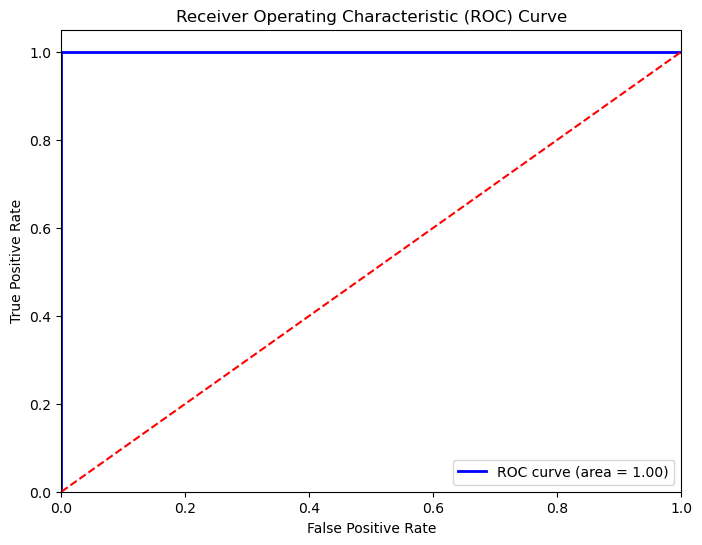

In [60]:
# ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)
roc_auc = auc(fpr, tpr)
  
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [61]:
df5 = df4[df4['status'] == 0]
df5.tail(5)

,customer,country,status,item type,application,width,product_ref,thickness_log,selling_price_log,quantity tons_log
181527,30161559.0,30.0,0,3,10.0,1525.0,640665,1.924249,6.126869,4.172224
181529,30161559.0,30.0,0,3,10.0,1500.0,640665,2.180417,6.129050,4.043552
181531,30161559.0,30.0,0,3,10.0,1830.0,640665,1.578979,6.133398,5.333801
181533,30198408.0,25.0,0,3,10.0,1150.0,1668701718,0.875469,6.587550,4.644332
181535,30198408.0,25.0,0,3,10.0,1146.0,1668701718,0.875469,6.590301,4.673504


In [62]:
# Define the new sample as a 2D numpy array
new_sample = np.array([[30161559.0, 30.0, 3.0, 10.0, 1830.0, 640665, 1.578979, 6.133398, 5.333801]])

# Make prediction for the new sample using the trained model
new_predict = rfc_model2.predict(new_sample)

# Check the prediction and output the result
if new_predict[0] == 1:
    print('Won')
else:
    print('Lost')

Lost


In [63]:
#saving the model using the pickle

model_path1 = 'D:/Guvi_Data_Science/MDT33/Capstone_Project/Copper_Modelling/Class_model1.pkl'
with open(model_path1, 'wb') as f:
    pickle.dump(rfc_model2, f)

In [64]:
import pickle

model_path1 = 'D:/Guvi_Data_Science/MDT33/Capstone_Project/Copper_Modelling/Class_model1.pkl'

# Load the model
with open(model_path1, 'rb') as f:
    Class_model = pickle.load(f)


In [65]:
# Define the new sample as a 2D numpy array
new_sample = np.array([[30161559.0, 30.0, 3.0, 10.0, 1830.0, 640665, 1.578979, 6.133398, 5.333801]])

# Make prediction for the new sample using the trained model
new_predict = Class_model1.predict(new_sample)

# Check the prediction and output the result
if new_predict[0] == 1:
    print('Won')
else:
    print('Lost')

Lost


In [66]:
# Define the new sample as a 2D numpy array
new_sample = np.array([[30200854.0, 25.0, 1, 41.0, 1500.0, 164141591, 0.667829, 6.380123, 5.342748]])

# Make prediction for the new sample using the trained model
new_predict = rfc_model2.predict(new_sample)

# Check the prediction and output the result
if new_predict[0] == 1:
    print('Won')
else:
    print('Lost')

Won


In [67]:
df5 = df4[df4['status'] == 1]
df5.tail(5)

,customer,country,status,item type,application,width,product_ref,thickness_log,selling_price_log,quantity tons_log
181668,30200854.0,25.0,1,1,41.0,1220.0,164141591,0.672944,6.383507,4.639402
181669,30200854.0,25.0,1,1,41.0,1500.0,164141591,0.667829,6.380123,5.342748
181670,30200854.0,25.0,1,1,41.0,1250.0,164141591,0.536493,6.429719,1.655480
181671,30200854.0,25.0,1,1,41.0,1250.0,164141591,0.615186,6.400257,3.445693
181672,30200854.0,25.0,1,1,41.0,1240.0,164141591,0.536493,6.410175,6.010499


In [68]:
# Define the new sample as a 2D numpy array
new_sample = np.array([[30223403.0, 78.0, 1, 10.0, 1500.0, 1668701718, 0.693147, 7.134094, 2.274061]])

# Make prediction for the new sample using the trained model
new_predict = Class_model.predict(new_sample)

# Check the prediction and output the result
if new_predict[0] == 1:
    print('Won')
else:
    print('Lost')

Lost


In [69]:
# Define the new sample as a 2D numpy array
new_sample = np.array([[30200854.0, 25.0, 1, 41.0, 1500.0, 164141591, 0.667829, 6.380123, 5.342748]])

# Make prediction for the new sample using the trained model
new_predict = Class_model.predict(new_sample)

# Check the prediction and output the result
if new_predict[0] == 1:
    print('Won')
else:
    print('Lost')

Won
